In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("collision_data.csv")
df.head()

,Unnamed: 0,SEVERITYCODE,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,0,2,Matched,Intersection,Injury Collision,Angles,2,0,0,2,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Overcast,Wet,Daylight,10.0,Entering at angle,N
1,1,1,Matched,Block,Property Damage Only Collision,Other,3,0,0,3,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,23.0,From same direction - all others,N
2,2,1,Matched,Intersection,Property Damage Only Collision,Angles,2,0,0,2,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,10.0,Entering at angle,N
3,3,2,Matched,Intersection,Injury Collision,Cycles,3,0,1,1,...,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0.0,Clear,Dry,Daylight,5.0,Vehicle Strikes Pedalcyclist,N
4,4,2,Matched,Block,Injury Collision,Head On,2,0,0,2,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Dark - Street Lights On,30.0,From opposite direction - all others,N


In [5]:
df.shape

(99976, 22)

In [6]:
df.describe()

,Unnamed: 0,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,ST_COLCODE
count,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000
mean,49987.500000,1.324328,2.438305,0.044581,0.035919,1.964361,14.283308,0.050212,22.058154
std,28860.729593,0.468125,1.421063,0.216829,0.187214,0.584710,6.840410,0.218383,14.804548
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24993.750000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,0.000000,10.000000
50%,49987.500000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,0.000000,14.000000
75%,74981.250000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,0.000000,32.000000
max,99975.000000,2.000000,57.000000,6.000000,2.000000,12.000000,69.000000,1.000000,88.000000


In [9]:
df.columns

Index(['Unnamed: 0', 'SEVERITYCODE', 'STATUS', 'ADDRTYPE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'ST_COLDESC', 'HITPARKEDCAR'],
      dtype='object')

In [10]:
df.dtypes

Unnamed: 0         int64
SEVERITYCODE       int64
STATUS            object
ADDRTYPE          object
SEVERITYDESC      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDATE           object
INCDTTM           object
JUNCTIONTYPE      object
SDOT_COLCODE       int64
SDOT_COLDESC      object
UNDERINFL        float64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
ST_COLCODE       float64
ST_COLDESC        object
HITPARKEDCAR      object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99976 non-null  int64  
 1   SEVERITYCODE   99976 non-null  int64  
 2   STATUS         99976 non-null  object 
 3   ADDRTYPE       99976 non-null  object 
 4   SEVERITYDESC   99976 non-null  object 
 5   COLLISIONTYPE  99976 non-null  object 
 6   PERSONCOUNT    99976 non-null  int64  
 7   PEDCOUNT       99976 non-null  int64  
 8   PEDCYLCOUNT    99976 non-null  int64  
 9   VEHCOUNT       99976 non-null  int64  
 10  INCDATE        99976 non-null  object 
 11  INCDTTM        99976 non-null  object 
 12  JUNCTIONTYPE   99976 non-null  object 
 13  SDOT_COLCODE   99976 non-null  int64  
 14  SDOT_COLDESC   99976 non-null  object 
 15  UNDERINFL      99976 non-null  float64
 16  WEATHER        99976 non-null  object 
 17  ROADCOND       99976 non-null  object 
 18  LIGHTC

__1. (poin 5) Menurut dataset collision, berapa perbandingan rasio kecelakaan antara kategori Injury Collision dengan Property Damage Collision (kolom SEVERITYDESC)? (Jawab pertanyaan ini menggunakan plot yang sesuai dan jelaskan ratio perbandingannya dalam markdown!)__

In [26]:
df["SEVERITYDESC"]

0                      Injury Collision
1        Property Damage Only Collision
2        Property Damage Only Collision
3                      Injury Collision
4                      Injury Collision
                      ...              
99971                  Injury Collision
99972    Property Damage Only Collision
99973                  Injury Collision
99974                  Injury Collision
99975    Property Damage Only Collision
Name: SEVERITYDESC, Length: 99976, dtype: object

In [34]:
no_1 = df["SEVERITYDESC"].value_counts(normalize=True).to_frame()
percentage_no_1 = no_1*100
percentage_no_1

,SEVERITYDESC
Property Damage Only Collision,67.567216
Injury Collision,32.432784


Text(0, 0.5, 'Percentage')

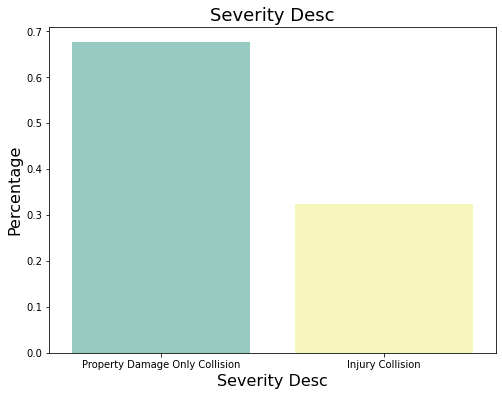

In [50]:
plt.figure(figsize=(8,6))
sns.barplot (x = no_1.index, y ='SEVERITYDESC', palette='Set3', data = no_1)
plt.title('Severity Desc', fontsize=18)
plt.xlabel('Severity Desc', fontsize=16)
plt.ylabel('Percentage', fontsize=16)

__Dapat terlihat bahwa perbandingan antara Property Damage Only Collision : Injury Collision adalah 7 : 3__

__2. (poin 10) Menggunakan kolom PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT. Hitunglah dan tampilkan dari tiap kolom tersebut hasil dari:
    Data Central Tendency (Mean, Median dan Mode)
    Data Dispersion (Persebaran data atau Standard Deviation)
    IQR, Upper bound dan Lower Bound__



__Data Central Tendency (Mean,Median,Mode)__

In [82]:
from scipy import stats

In [83]:
no_2 = df[["PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT"]]
no_2


,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
0,2,0,0,2
1,3,0,0,3
2,2,0,0,2
3,3,0,1,1
4,2,0,0,2
...,...,...,...,...
99971,3,0,0,2
99972,2,0,0,2
99973,3,0,0,2
99974,2,0,1,1


In [88]:
mod=[]
for x in no_2.columns:
    mod.append((stats.mode(no_2[x])[0]))


In [90]:
mean=[]
median=[]
mode=[]
for i in no_2.columns:
    mean.append(no_2[i].mean())
    median.append(no_2[i].median())
for i in mod:
    for j in i:
        mode.append(j)
        
no_2_a=pd.DataFrame([mean,median,mode],columns=no_2.columns)
no_2_a.rename({0:'mean',1:'median',2:'mode'},inplace=True)
no_2_a    

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
mean,2.438305,0.044581,0.035919,1.964361
median,2.000000,0.000000,0.000000,2.000000
mode,2.000000,0.000000,0.000000,2.000000


__Data Dispersion (Persebaran data atau Standard Deviation)__

In [92]:
jarak=[]
var=[]
std=[]
for i in no_2.columns:
    jarak.append(np.ptp(no_2[i].mean()))
    var.append(no_2[i].var())
    std.append(no_2[i].std())        
no_2_b=pd.DataFrame([jarak,var,std],columns=no_2.columns)
no_2_b.rename({0:'range',1:'variance',2:'std dev'},inplace=True)
no_2_b

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
range,0.000000,0.000000,0.000000,0.000000
variance,2.019420,0.047015,0.035049,0.341886
std dev,1.421063,0.216829,0.187214,0.584710


In [93]:
Q1=[]
Q3=[]
IQR=[]
LB=[]
UB=[]
for i in no_2.columns:
    Q1.append(np.quantile(no_2[i],0.25))
    Q3.append(np.quantile(no_2[i],0.75))
    IQR.append(np.quantile(no_2[i],0.75)-np.quantile(no_2[i],0.25))
    LB.append((np.quantile(no_2[i],0.75)-np.quantile(no_2[i],0.25))-1.5*(np.quantile(no_2[i],0.25)))
    UB.append((np.quantile(no_2[i],0.75)-np.quantile(no_2[i],0.25))+1.5*(np.quantile(no_2[i],0.75)))
no_2_c=pd.DataFrame([Q1,Q3,IQR,LB,UB],columns=no_2.columns)
no_2_c.rename({0:'Q1',1:'Q3',2:'IQR',3:'Lower Bound',4:'Upper Bound'},inplace=True)
no_2_c

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
Q1,2.0,0.0,0.0,2.0
Q3,3.0,0.0,0.0,2.0
IQR,1.0,0.0,0.0,0.0
Lower Bound,-2.0,0.0,0.0,-3.0
Upper Bound,5.5,0.0,0.0,3.0


__3. (poin 10) Pada dataset di atas, terdapat kolom ADDRTYPE yang mana terdapat tiga grup "Block", "Intersection", "Alley". Anggaplah asumsi ketiga grup tersebut memenuhi syarat untuk menggunakan parametric test. Lakukanlah hypothesis testing untuk membuktikan apakah rata-rata korban (kolom PERSONCOUNT) antar kelompok sama atau tidak.__

In [94]:
no_3 = df[['ADDRTYPE','PERSONCOUNT']]
no_3

,ADDRTYPE,PERSONCOUNT
0,Intersection,2
1,Block,3
2,Intersection,2
3,Intersection,3
4,Block,2
...,...,...
99971,Block,3
99972,Block,2
99973,Intersection,3
99974,Intersection,2


In [95]:
no_3_mean = no_3.groupby('ADDRTYPE')
no_3_mean.mean()

,PERSONCOUNT
ADDRTYPE,
Alley,2.086957
Block,2.392752
Intersection,2.516369


In [96]:
for i in no_3['ADDRTYPE'].unique():
    print(f"Mean ketika {i}: {no_3[no_3['ADDRTYPE']==i]['PERSONCOUNT'].mean()}")

Mean ketika Intersection: 2.516369450918749
Mean ketika Block: 2.3927523590516215
Mean ketika Alley: 2.0869565217391304


__- H0 : mean(intersection)=mean(block)=mean(alley)__

__- H1 : mean(intersection)!=mean(block)!=mean(alley)__

In [98]:
alpha = 0.05
fstats, pvalue = stats.stats.f_oneway(no_3[no_3['ADDRTYPE'] == 'Intersection']['PERSONCOUNT'],
                    no_3[no_3['ADDRTYPE'] == 'Block']['PERSONCOUNT'],
                    no_3[no_3['ADDRTYPE'] == 'Alley']['PERSONCOUNT'])
print(fstats,pvalue)

88.92910585296646 2.5875831512211814e-39


In [99]:
if pvalue < alpha :
    print('Success against H0, sum mean of accident among intersection, alley, dan block are different')
else:
    print('Failed to against H0, sum mean of accident among intersection, alley, dan block are same')

Success against H0, sum mean of accident among intersection, alley, dan block are different


__In summary, sum mean of accident among intersection, alley, dan block are different__

__4. (poin 10) Menggunakan kolom INCDTTM buatlah 2 (dua) kolom baru yang tiap kolom hanya menyimpan value tahun dan kolom lainnya menyimpan value jam. Dan tampilkan dalam sebuah piechart kecelakaan apa (kolom SEVERITYDESC) yang sering terjadi pada pukul 00:00 dini hari!__

In [24]:
df[['INCDTTM']] = df[['INCDTTM']].astype('datetime64')


In [101]:
no_4 = df[['INCDTTM','SEVERITYDESC','UNDERINFL']]
no_4

,INCDTTM,SEVERITYDESC,UNDERINFL
0,2013-03-27 14:54:00,Injury Collision,0.0
1,2013-03-29 09:26:00,Property Damage Only Collision,0.0
2,2019-04-20 17:42:00,Property Damage Only Collision,0.0
3,2020-04-15 17:47:00,Injury Collision,0.0
4,2013-03-31 02:09:00,Injury Collision,0.0
...,...,...,...
99971,2018-11-12 08:12:00,Injury Collision,0.0
99972,2018-12-18 09:14:00,Property Damage Only Collision,0.0
99973,2019-01-19 09:25:00,Injury Collision,0.0
99974,2019-01-15 16:48:00,Injury Collision,0.0


In [102]:
no_4['Year'] = df['INCDTTM'].dt.year
no_4['Hour'] = df['INCDTTM'].dt.hour
no_4

<ipython-input-102-cc1ebfae2628>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_4['Year'] = df['INCDTTM'].dt.year
<ipython-input-102-cc1ebfae2628>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_4['Hour'] = df['INCDTTM'].dt.hour


,INCDTTM,SEVERITYDESC,UNDERINFL,Year,Hour
0,2013-03-27 14:54:00,Injury Collision,0.0,2013,14
1,2013-03-29 09:26:00,Property Damage Only Collision,0.0,2013,9
2,2019-04-20 17:42:00,Property Damage Only Collision,0.0,2019,17
3,2020-04-15 17:47:00,Injury Collision,0.0,2020,17
4,2013-03-31 02:09:00,Injury Collision,0.0,2013,2
...,...,...,...,...,...
99971,2018-11-12 08:12:00,Injury Collision,0.0,2018,8
99972,2018-12-18 09:14:00,Property Damage Only Collision,0.0,2018,9
99973,2019-01-19 09:25:00,Injury Collision,0.0,2019,9
99974,2019-01-15 16:48:00,Injury Collision,0.0,2019,16


In [103]:
no_4_a = no_4[no_4['Hour']==0][['SEVERITYDESC']]
no_4_a['SEVERITYDESC'].value_counts()

Property Damage Only Collision    1854
Injury Collision                   565
Name: SEVERITYDESC, dtype: int64

In [104]:
label = no_4_a['SEVERITYDESC'].value_counts().index

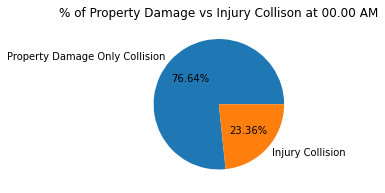

In [105]:
plt.figure(figsize=(8,3))
plt.pie(no_4_a['SEVERITYDESC'].value_counts(), labels=label, autopct='%.2f%%')
plt.title('% of Property Damage vs Injury Collison at 00.00 AM')
plt.show()

__terlihat bahwa jenis kecelakaan yang paling sering terjadi adalah property damage__

__5. (poin 15) Saya memiliki asumsi bahwa, dari data tahun ke tahun, rasio kecelakaan yang terjadi akibat pengendara yang terpengaruh alkohol lebih sering terjadi pada pukul 20:00 malam. Apakah Anda setuju dengan asumsi saya? Jika iya, jelaskan alasannya. Jika tidak, jelaskan alasannya. Anda perlu menggunakan stackplot untuk menjawab pertanyaan ini.__

In [106]:
no_5 = no_4[no_4['UNDERINFL']==1][['UNDERINFL','Hour','Year']]
no_5_year = no_5.groupby('Hour')

In [107]:
total = no_4.groupby('Hour')
a = total.count()['UNDERINFL'].to_frame()

In [108]:
alcohol = no_5_year[['UNDERINFL']].count()
alcohol['Total Kecelakaan'] = a
alcohol['Rasio Under Alcohol']=alcohol['UNDERINFL']/alcohol['Total Kecelakaan']*100
alcohol['Rasio Tanpa Alcohol']=100-alcohol['Rasio Under Alcohol']
alcohol

,UNDERINFL,Total Kecelakaan,Rasio Under Alcohol,Rasio Tanpa Alcohol
Hour,,,,
0,449,2419,18.561389,81.438611
1,539,1983,27.181039,72.818961
2,507,1953,25.960061,74.039939
3,185,998,18.537074,81.462926
4,108,728,14.835165,85.164835
5,60,1049,5.719733,94.280267
6,36,2075,1.734940,98.265060
7,50,4166,1.200192,98.799808
8,61,5467,1.115786,98.884214


In [109]:
b = []
b.append(list(alcohol['Rasio Under Alcohol']))
b.append(list(alcohol['Rasio Tanpa Alcohol']))
b

[[18.561389003720546,
  27.18103883005547,
  25.960061443932414,
  18.537074148296593,
  14.835164835164836,
  5.719733079122975,
  1.7349397590361446,
  1.2001920307249159,
  1.1157856228278762,
  0.9617311160088158,
  0.9933059814294969,
  1.6237623762376239,
  0.9493161705551086,
  1.2361958134168451,
  1.4854517611026032,
  1.366742596810934,
  1.8208794173185865,
  2.4633056796426294,
  3.8507209499575907,
  6.010433204808346,
  9.253888742420248,
  12.341304989666371,
  14.264036418816389,
  17.794004611837046],
 [81.43861099627945,
  72.81896116994453,
  74.03993855606758,
  81.4629258517034,
  85.16483516483517,
  94.28026692087703,
  98.26506024096386,
  98.79980796927508,
  98.88421437717213,
  99.03826888399118,
  99.0066940185705,
  98.37623762376238,
  99.05068382944489,
  98.76380418658316,
  98.51454823889739,
  98.63325740318906,
  98.1791205826814,
  97.53669432035737,
  96.14927905004241,
  93.98956679519165,
  90.74611125757976,
  87.65869501033363,
  85.735963581183

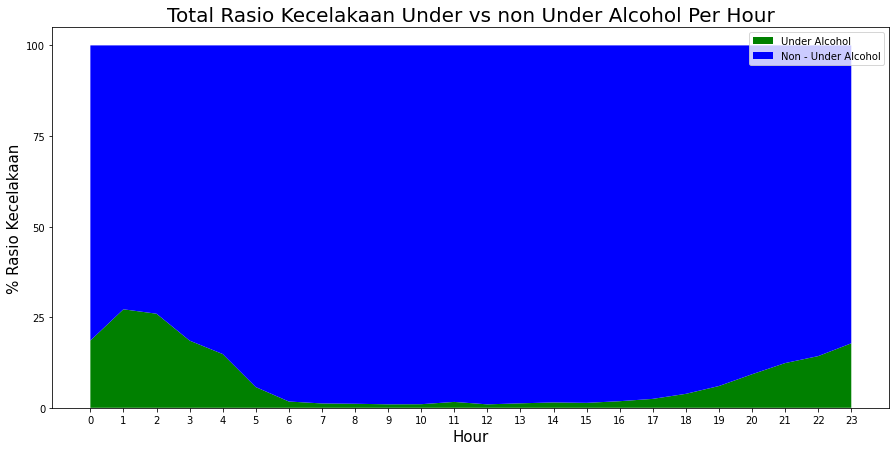

In [113]:
plt.figure(figsize=(15,7))
plt.title('Total Rasio Kecelakaan Under vs non Under Alcohol Per Hour',fontsize=20)
plt.xticks(np.arange(0,24))
plt.stackplot(alcohol.index,b,colors=['green','blue'])
plt.yticks(np.linspace(0,100,5))
plt.ylabel('% Rasio Kecelakaan',fontsize=15)
plt.xlabel('Hour',fontsize=15)
plt.legend(['Under Alcohol','Non - Under Alcohol'])

plt.show()

__ternyata paling sering terjadi kecelakaan pada pukul jam 01.00 malam, berdasarkan grafik di atas, yang diakibatkan oleh alkohol__

__6. (poin 10) Berdasarkan jumlah laporan kecelakaan dari tahun ke tahun pada dataset ini, tahun 2011 adalah tahun di mana jumlah laporan kecelakaan tercatat paling banyak. Apakah Anda setuju dengan hal ini? Gunakan plot yang sesuai untuk mendukung jawaban Anda.__

In [115]:
year = no_4.groupby('Year')
no_6 = year.count()
no_6['Total Kecelakaan']=no_6['Hour']
no_6

,INCDTTM,SEVERITYDESC,UNDERINFL,Hour,Total Kecelakaan
Year,,,,,
2004,2,2,2,2,2
2005,1,1,1,1,1
2006,4,4,4,4,4
2007,5,5,5,5,5
2008,77,77,77,77,77
2009,71,71,71,71,71
2010,10074,10074,10074,10074,10074
2011,7951,7951,7951,7951,7951
2012,9541,9541,9541,9541,9541


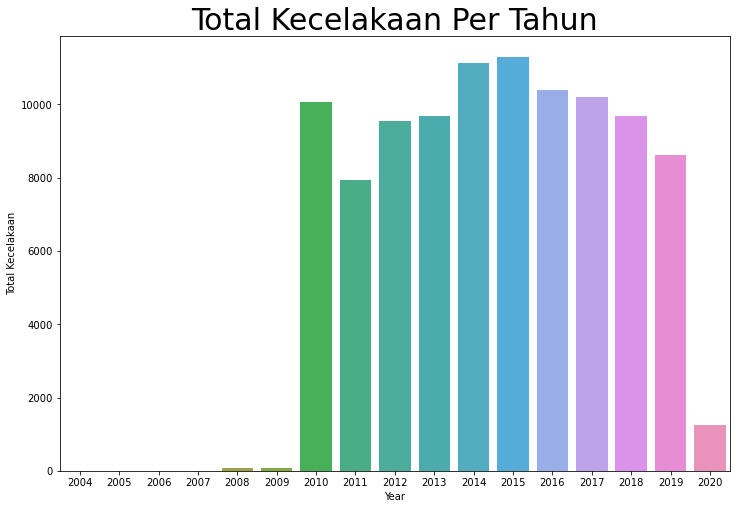

In [117]:
plt.figure(figsize=(12,8))
sns.barplot(y='Total Kecelakaan',x=no_6.index,data=no_6)
plt.title('Total Kecelakaan Per Tahun',fontsize=30)
plt.show()

__terbukti, bahwa kenyataannya pada tahun 2015 lah yang terbanyak, berdasarkan grafik di atas__